In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
%matplotlib notebook

In [2]:
df = pd.read_csv('glassdoor-data.csv')
df.head()

,Job,"Salary, min","Salary, max",Company,City,Description
0,Data Scientist/Machine Learning,71,123,PulsePoint\r\n4.3,"New York, NY","PulsePoint™, a global programmatic advertising..."
1,Data Scientist/Machine Learning,102,127,PulsePoint\r\n4.3,"New York, NY","PulsePoint™, a global programmatic advertising..."
2,Data Scientist,108,140,Via Transportation\r\n3.7,"New York, NY",Job Brief\r\n\r\nThe ideal candidate will have...
3,Data Scientist,93,124,Via Transportation\r\n3.7,"New York, NY","At Via, we're on the cutting edge of mobility...."
4,Data Science Associate,39,85,Via Transportation\r\n3.7,"New York, NY",The mission of Success Academies is to reimagi...


In [3]:
df['Salary, min'] = (pd.to_numeric(df['Salary, min'],errors='coerce').fillna(0)).astype(int)
df['Salary, max'] = (pd.to_numeric(df['Salary, max'],errors='coerce').fillna(0)).astype(int)

In [4]:
df['Mean'] = df[['Salary, min', 'Salary, max']].mean(axis=1)

In [5]:
jobs = [
        'Data Scientist',
        'Data Analyst',
        'Data Engineer',
        'Software Developer']

In [6]:
def get_grp(x, df, col_name, my_list):
    for c in my_list: 
        if c in df[col_name][x]:
            return c

selected = df.loc[df['Job'].isin(jobs)]
selected = selected.groupby(lambda x : get_grp(x, df, 'Job', jobs))
table = selected.mean()
table

,"Salary, min","Salary, max",Mean
Data Analyst,45.923810,68.766667,57.345238
Data Engineer,59.741379,89.724138,74.732759
Data Scientist,73.109489,99.189781,86.149635
Software Developer,51.253394,78.909502,65.081448


In [7]:
table.sort_values(['Mean'], ascending=[True], inplace=True)
table

,"Salary, min","Salary, max",Mean
Data Analyst,45.923810,68.766667,57.345238
Software Developer,51.253394,78.909502,65.081448
Data Engineer,59.741379,89.724138,74.732759
Data Scientist,73.109489,99.189781,86.149635


In [13]:
means = table['Mean']
mins = table['Salary, min']
maxes = table['Salary, max']

font_color = '#525252'

<IPython.core.display.Javascript object>


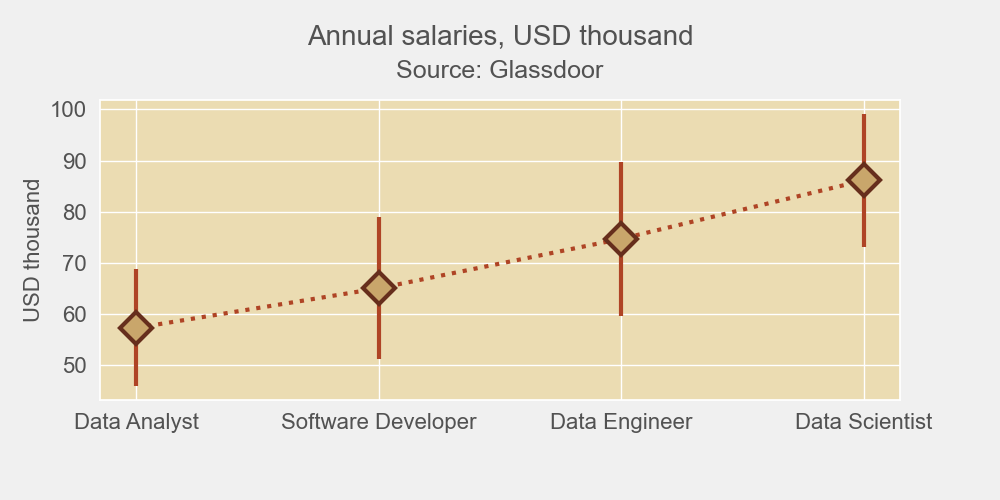

In [14]:
sns.set(rc={'axes.facecolor':'#EBDCB2'})

fig, ax = plt.subplots(figsize=(10,5), facecolor=(.94, .94, .94))
plt.tight_layout()
ax.errorbar(table.index, means, [means - mins, maxes - means],
            fmt='D', 
            mfc = '#C9A66B',
            mec = '#662E1C',
            ms = 16,
            mew = 3, 
            ecolor='#AF4425', 
            lw=3,
            ls = ':',
            color='#AF4425')

plt.xticks(color=font_color)
plt.yticks(color=font_color)
ax.set_ylabel('USD thousand', color=font_color, fontsize=16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)

subtitle = fig.suptitle('Annual salaries, USD thousand', y=.95, fontsize=20, color=font_color)
title = plt.title('Source: Glassdoor', pad=16, fontsize=18, color=font_color)
title.set_position([.5, 1])
plt.subplots_adjust(top=0.8, bottom=0.2, left=0.1, right=0.9)

In [16]:
filename = 'mpl-errorbar'
plt.savefig(filename+'.png', facecolor=(.94, .94, .94))